# **Course: Data Science for Decision Support**
**Assignment 2**

**Author:** MADHUMITHA, KESAVAN: 537467

**Regression**

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sb
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold

!pip install scikit-learn xgboost catboost lightgbm
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


1)	`Read the data from your individual variant into Python notebook`

In [163]:
df= pd.read_csv("diamonds.csv")

In [54]:
# Encoding categorical variables for plotting
label_encoders = {}
for column in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    df[column + '_encoded'] = le.fit_transform(df[column])
    label_encoders[column] = le

#print out the mapping of labels to integers
for column, le in label_encoders.items():
    print(f"The encoding for {column} is: {dict(zip(le.classes_, le.transform(le.classes_)))}")

df.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)

# Display the dataframe with encoded columns
print(df.head())

The encoding for cut is: {'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}
The encoding for color is: {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}
The encoding for clarity is: {'I1': 0, 'IF': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7}
   Unnamed: 0  carat  depth  table  price     x     y     z  cut_encoded  \
0           1   0.23   61.5   55.0    326  3.95  3.98  2.43            2   
1           2   0.21   59.8   61.0    326  3.89  3.84  2.31            3   
2           3   0.23   56.9   65.0    327  4.05  4.07  2.31            1   
3           4   0.29   62.4   58.0    334  4.20  4.23  2.63            3   
4           5   0.31   63.3   58.0    335  4.34  4.35  2.75            1   

   color_encoded  clarity_encoded  
0              1                3  
1              1                2  
2              1                4  
3              5                5  
4              6                3  


`Task 2 "Data Analysis" (20 points)`

Objective: to evaluate the performance of 4 ML methods below and to make conclusions about the best fitted model.

* Random Forest,
* XG Boost,
* CatBoost
* LightGBM

1) `Divide your dataset into 2 parts: training set and testing set (80:20). Use some specific random_state to be capable to repeat the used split of the data. Output the dimension of the resulting datasets.`

In [57]:
X = df[['carat','cut_encoded','color_encoded','clarity_encoded','depth', 'table', 'x', 'y', 'z']]
Y = df[['price']]
print(X.shape,Y.shape)

(53940, 9) (53940, 1)


In [58]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
# Output the dimensions
print("Training set size (features):", x_train.shape)
print("Training set size (target):", y_train.shape)
print("Test set size (features):", x_test.shape)
print("Test set size (target):", y_test.shape)

Training set size (features): (43152, 9)
Training set size (target): (43152, 1)
Test set size (features): (10788, 9)
Test set size (target): (10788, 1)


In [59]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

2) `Scale your datasets with MinMax Scaler.`

In [61]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Output the scaled datasets
print("Scaled training dataset:", x_train_scaled)
print("Scaled test dataset:" ,x_test_scaled)

Scaled training dataset: [[0.37629938 0.25       0.33333333 ... 0.76629423 0.13904924 0.15      ]
 [0.16839917 1.         0.16666667 ... 0.61173184 0.11018676 0.12327044]
 [0.18711019 0.75       0.66666667 ... 0.61359404 0.11103565 0.12893082]
 ...
 [0.02702703 1.         0.33333333 ... 0.41806331 0.07572156 0.08490566]
 [0.14553015 0.75       1.         ... 0.5707635  0.10237691 0.12012579]
 [0.1954262  0.75       0.33333333 ... 0.63500931 0.11528014 0.12924528]]
Scaled test dataset: [[0.00831601 0.5        0.5        ... 0.36964618 0.06791171 0.07767296]
 [0.07900208 1.         0.33333333 ... 0.50651769 0.09202037 0.10251572]
 [0.04158004 0.5        0.16666667 ... 0.44320298 0.08047538 0.0927673 ]
 ...
 [0.02286902 0.25       0.5        ... 0.41154562 0.07589134 0.08113208]
 [0.21413721 0.5        0.33333333 ... 0.63780261 0.11578947 0.13427673]
 [0.18295218 0.25       1.         ... 0.59590317 0.11154499 0.12893082]]


3) `Preliminary analysis: Build 4 models based on 4 mentioned ML methods with default parameters. For each model: train with training set and output the regression score (R2), MSE, MAE of the model using training set. Now test your model with a testset and output the regression score (R2) and other metrics. Compare the metrics obtained with training and testset. Output dataframes with the following information. One dataframe for each metrics (e.g. 3 dataframes). Each row of the dataframe should correspond to a model and two columns correspond to the metric calculated on the training set and on the test set. Compare the results based on different metrics and select the best performed model.`

1) `Construct four ML regression models: random forest, XGBoost, CatBoost, and Light GBM.`

2) `Find the optimal values of the hyper-parameters with GridSearchCV() function and evaluate the performance with Kfold cross validation in the same way as in assignment 1.`

3) `Output the prediction results of the models with optimal parameters for one of the cross validations: create a dataframe with 5 columns, which correspond to "real values" and predicted values by each model on the test set and rows correspond to the observations from the test set.`

4) `Output dataframes with the following information. One dataframe for each metrics (e.g. 3 dataframes): rows correspond to models; columns correspond to the metric computed on the training set and on the test set. Compare the results based on different metrics. Make the conclusion about the best-performed of 8 constructed models (assignment 1 + assignment 2) considering different performance metrics.`

5) `Create parity plots (actual-predicted values) for the observations of the test set for one of the cross validations for all newly created models. Use Plotly library for this.
`
6) `Select 3 best models for your dataset based on the R2 metric. Plot the results of R² obtained for the test set by selected models with Plotly Bar plot.`

### Data Analysis

1) `Construct four ML regression models: random forest, XGBoost, CatBoost, and Light GBM.`

In [73]:
# models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, random_state=42)
}

# Metrics collection
r2_data = {}
mse_data = {}
mae_data = {}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store metrics
    r2_data[name] = [r2]
    mse_data[name] = [mse]
    mae_data[name] = [mae]

# Create DataFrames from collected results
r2_df = pd.DataFrame(r2_data, index=["R²"])
mse_df = pd.DataFrame(mse_data, index=["MSE"])
mae_df = pd.DataFrame(mae_data, index=["MAE"])

# Display results
print("\nR² Scores:")
print(r2_df)
print("\nMSE Scores:")
print(mse_df)
print("\nMAE Scores:")
print(mae_df)

Training Random Forest...
Training XGBoost...
Training CatBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9
[LightGBM] [Info] Start training from score 3939.490707

R² Scores:
    Random Forest   XGBoost  CatBoost  LightGBM
R²       0.981473  0.981276   0.98272  0.981885

MSE Scores:
     Random Forest        XGBoost       CatBoost       LightGBM
MSE   294519.42303  297651.276902  274702.564495  287971.836262

MAE Scores:
     Random Forest     XGBoost    CatBoost    LightGBM
MAE     268.045552  277.941277  271.718387  284.858833


### **R² Scores**
| Model           | R²        |
|------------------|-----------|
| Random Forest    | 0.981473  |
| XGBoost          | 0.981276  |
| CatBoost         | 0.982720  |
| LightGBM         | 0.981885  |

---

### **MSE Scores**
| Model           | MSE            |
|------------------|----------------|
| Random Forest    | 294,519.42303  |
| XGBoost          | 297,651.27690  |
| CatBoost         | 274,702.56450  |
| LightGBM         | 287,971.83626  |

---

### **MAE Scores**
| Model           | MAE       |
|------------------|-----------|
| Random Forest    | 268.04555 |
| XGBoost          | 277.94128 |
| CatBoost         | 271.71839 |
| LightGBM         | 284.85883 |

#### Conclusion:

1) CatBoost seems to perform the best among the four models. It has the highest R² score and the lowest MSE and MAE scores.
2) Random Forest has the lowest MAE, indicating it produces the smallest average errors.
3) XGBoost and LightGBM models performs good but slightly underperform compared to CatBoost and Random Forest.

2) `Find the optimal values of the hyper-parameters with GridSearchCV() function and evaluate the performance with Kfold cross validation in the same way as in assignment 1.`

In [85]:
# models and parameter grids
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42)
}

param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 10]
    },
    "CatBoost": {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'depth': [6, 10, 12]
    },
    "LightGBM": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [31, 50, 70]
    }
}

# GridSearchCV to find the best parameters for each model
for name, model in models.items():
    print(f"Optimizing {name}...")
    
    # GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(x_train_scaled, y_train)
    
    # Output the best parameters found by GridSearchCV
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    # Get the best model and evaluate its performance
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test_scaled)
    
    # Calculate MSE and R² on the test set
    mse = mean_squared_error(y_test, y_pred)
    r2 = best_model.score(x_test_scaled, y_test)
    
    print(f"Test MSE for {name}: {mse}")
    print(f"Test R² for {name}: {r2}\n")

Optimizing Random Forest...


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
Test MSE for Random Forest: 291850.2346501736
Test R² for Random Forest: 0.9816409691997233

Optimizing XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Test MSE for XGBoost: 279181.9623716062
Test R² for XGBoost: 0.9824378751923716

Optimizing CatBoost...
Best parameters for CatBoost: {'depth': 10, 'iterations': 300, 'learning_rate': 0.1}
Test MSE for CatBoost: 276044.70529804047
Test R² for CatBoost: 0.9826352264102352

Optimizing LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9
[LightGBM] [Info] Start training from score 3939.4

### Model Optimization and Performance Results

#### Random Forest
- **Best Hyperparameters:**
  - `max_depth`: 20
  - `min_samples_split`: 5
  - `n_estimators`: 300
- **Test MSE:** 291850.23
- **Test R²:** 0.9816

#### XGBoost
- **Best Hyperparameters:**
  - `learning_rate`: 0.1
  - `max_depth`: 6
  - `n_estimators`: 200
- **Test MSE:** 279181.96
- **Test R²:** 0.9824

#### CatBoost
- **Best Hyperparameters:**
  - `depth`: 10
  - `iterations`: 300
  - `learning_rate`: 0.1
- **Test MSE:** 276044.71
- **Test R²:** 0.9826

#### LightGBM
- **Best Hyperparameters:**
  - `learning_rate`: 0.05
  - `n_estimators`: 300
  - `num_leaves`: 31
- **Test MSE:** 281685.61
- **Test R²:** 0.9823


In [115]:
# models with optimized hyperparameters
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=5, random_state=42),
    "XGBoost": xgb.XGBRegressor(learning_rate=0.1, max_depth=6, n_estimators=200, objective='reg:squarederror', random_state=42),
    "CatBoost": CatBoostRegressor(depth=10, iterations=300, learning_rate=0.1, verbose=0, random_state=42),
    "LightGBM": lgb.LGBMRegressor(learning_rate=0.05, n_estimators=300, num_leaves=31, random_state=42)
}

# KFold (5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Metrics storage
r2_scores = {model_name: [] for model_name in models.keys()}

# K-Fold Cross Validation and Model Evaluation
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} with KFold Cross-Validation...")

    fold_r2_scores = []  # Store R² scores for this model across folds
    
    for fold, (train_index, test_index) in enumerate(kf.split(x_train_scaled)):
        # Split data into training and testing based on the fold
        X_train, X_test = x_train_scaled[train_index], x_train_scaled[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        
        # Train the model
        model.fit(X_train, y_train_fold)
        
        # Predict and evaluate on the test set
        y_pred = model.predict(X_test)
        
        # Calculate R² for this fold
        r2 = r2_score(y_test_fold, y_pred)
        fold_r2_scores.append(r2)
        
        print(f"Fold {fold + 1} - R²: {r2:.4f}")
    
    # Compute average R² for the model
    avg_r2 = np.mean(fold_r2_scores)
    r2_scores[model_name] = avg_r2
    print(f"Average R² for {model_name}: {avg_r2:.4f}")

# Output the results
print("\nSummary of R² Scores for all Models:")
for model_name, avg_r2 in r2_scores.items():
    print(f"{model_name}: {avg_r2:.4f}")

# Conclusion: Find the best model based on the average R² score
best_model = max(r2_scores, key=r2_scores.get)
best_r2 = r2_scores[best_model]
print(f"\nBest model based on average R²: {best_model} with R² = {best_r2:.4f}")


Shape of X: (53940, 9)
Shape of Y: (53940,)
Training set size (features): (43152, 9)
Training set size (target): (43152,)
Test set size (features): (10788, 9)
Test set size (target): (10788,)
Scaled training dataset: [[0.37629938 0.25       0.33333333 ... 0.76629423 0.13904924 0.15      ]
 [0.16839917 1.         0.16666667 ... 0.61173184 0.11018676 0.12327044]
 [0.18711019 0.75       0.66666667 ... 0.61359404 0.11103565 0.12893082]
 ...
 [0.02702703 1.         0.33333333 ... 0.41806331 0.07572156 0.08490566]
 [0.14553015 0.75       1.         ... 0.5707635  0.10237691 0.12012579]
 [0.1954262  0.75       0.33333333 ... 0.63500931 0.11528014 0.12924528]]
Scaled test dataset: [[0.00831601 0.5        0.5        ... 0.36964618 0.06791171 0.07767296]
 [0.07900208 1.         0.33333333 ... 0.50651769 0.09202037 0.10251572]
 [0.04158004 0.5        0.16666667 ... 0.44320298 0.08047538 0.0927673 ]
 ...
 [0.02286902 0.25       0.5        ... 0.41154562 0.07589134 0.08113208]
 [0.21413721 0.5     

### KFold Cross-Validation Results

#### Evaluating Random Forest with KFold Cross-Validation...
- **Fold 1** - R²: 0.9806
- **Fold 2** - R²: 0.9805
- **Fold 3** - R²: 0.9801
- **Fold 4** - R²: 0.9814
- **Fold 5** - R²: 0.9806

**Average R² for Random Forest**: 0.9806

---

#### Evaluating XGBoost with KFold Cross-Validation...
- **Fold 1** - R²: 0.9815
- **Fold 2** - R²: 0.9817
- **Fold 3** - R²: 0.9802
- **Fold 4** - R²: 0.9823
- **Fold 5** - R²: 0.9823

**Average R² for XGBoost**: 0.9816

---

#### Evaluating CatBoost with KFold Cross-Validation...
- **Fold 1** - R²: 0.9815
- **Fold 2** - R²: 0.9826
- **Fold 3** - R²: 0.9808
- **Fold 4** - R²: 0.9824
- **Fold 5** - R²: 0.9805

**Average R² for CatBoost**: 0.9816

---

#### Evaluating LightGBM with KFold Cross-Validation...
- **Fold 1** - R²: 0.9815
- **Fold 2** - R²: 0.9818
- **Fold 3** - R²: 0.9804
- **Fold 4** - R²: 0.9828
- **Fold 5** - R²: 0.9820

**Average R² for LightGBM**: 0.9817

---

#### Summary of R² Scores for all Models:
- **Random Forest**: 0.9806
- **XGBoost**: 0.9816
- **CatBoost**: 0.9816
- **LightGBM**: 0.9817

**Best model based on average R²**: **LightGBM** with R² = **0.9817**


1) Random Forest: The R² scores across the five folds are very close (ranging from 0.9801 to 0.9814). This indicates that the model is fairly consistent and stable across different subsets of the data.
2) XGBoost: The R² scores for XGBoost are also consistent (ranging from 0.9802 to 0.9823), which shows that this model is performing reliably across the different folds.
3) CatBoost: The R² values for CatBoost show similar stability, with values ranging from 0.9805 to 0.9826. This indicates that CatBoost is also performing well and consistently.
4) LightGBM: The R² scores for LightGBM are the most consistent (ranging from 0.9804 to 0.9828), indicating that the model is reliable and performs well across different splits of the data.
5) Model Comparison: XGBoost, CatBoost, and LightGBM are quite competitive with each other. All three models show strong performance, but LightGBM edges out slightly in terms of R².
6) Random Forest: While Random Forest is a strong model, it doesn't quite match the performance of the more specialized gradient boosting models (XGBoost, CatBoost, LightGBM), which are generally more effective at capturing complex patterns in data.

3) `Output the prediction results of the models with optimal parameters for one of the cross validations: create a dataframe with 5 columns, which correspond to "real values" and predicted values by each model on the test set and rows correspond to the observations from the test set.`

In [129]:
best_random_forest = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=5, random_state=42)
best_xgboost = XGBRegressor(learning_rate=0.1, max_depth=6, n_estimators=200, random_state=42)
best_catboost = CatBoostRegressor(depth=10, iterations=300, learning_rate=0.1, silent=True, random_state=42)
best_lightgbm = lgb.LGBMRegressor(learning_rate=0.05, n_estimators=300, num_leaves=31, random_state=42)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a dictionary to store prediction results for each fold
results_dict = {
    'Real Values': [],
    'Random Forest Predictions': [],
    'XGBoost Predictions': [],
    'CatBoost Predictions': [],
    'LightGBM Predictions': []
}

# Iterate over each fold to get predictions
for fold, (train_index, test_index) in enumerate(kf.split(x_train_scaled)):
    if fold == 0:  
        X_train, X_test = x_train_scaled[train_index], x_train_scaled[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
        
        # Fit and predict with Random Forest
        best_random_forest.fit(X_train, y_train_fold)
        rf_preds = best_random_forest.predict(X_test)

        # Fit and predict with XGBoost
        best_xgboost.fit(X_train, y_train_fold)
        xgb_preds = best_xgboost.predict(X_test)

        # Fit and predict with CatBoost
        best_catboost.fit(X_train, y_train_fold)
        catboost_preds = best_catboost.predict(X_test)

        # Fit and predict with LightGBM
        best_lightgbm.fit(X_train, y_train_fold)
        lgbm_preds = best_lightgbm.predict(X_test)

        # Append the results to the dictionary
        results_dict['Real Values'].extend(y_test_fold)
        results_dict['Random Forest Predictions'].extend(rf_preds)
        results_dict['XGBoost Predictions'].extend(xgb_preds)
        results_dict['CatBoost Predictions'].extend(catboost_preds)
        results_dict['LightGBM Predictions'].extend(lgbm_preds)

# Convert the dictionary to a DataFrame
predictions_df = pd.DataFrame(results_dict)

# Display the first few rows of the DataFrame
print(predictions_df.head())

# save the DataFrame to a CSV
predictions_df.to_csv('model_predictions_fold1.csv', index=False)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 34521, number of used features: 9
[LightGBM] [Info] Start training from score 3952.591640
   Real Values  Random Forest Predictions  XGBoost Predictions  \
0        16231               13927.837839         14393.079102   
1         4540                4564.637472          4415.903320   
2        12968               13865.172797         13580.149414   
3         1607                1598.533052          1619.770264   
4         6129                5653.153267          5528.638672   

   CatBoost Predictions  LightGBM Predictions  
0          15294.920949          15117.481015  
1           4450.901366           4338.584715  
2          13247.391426          13723.134890  
3  

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.  
You can set `force_row_wise=true` to remove the overhead.  
And if memory is not enough, you can set `force_col_wise=true`.  
[LightGBM] [Info] Total Bins 1263  
[LightGBM] [Info] Number of data points in the train set: 34521, number of used features: 9  
[LightGBM] [Info] Start training from score 3952.591640  

| Real Values | Random Forest Predictions | XGBoost Predictions | CatBoost Predictions | LightGBM Predictions |
|-------------|----------------------------|----------------------|----------------------|----------------------|
| 16231       | 13927.837839               | 14393.079102         | 15294.920949         | 15117.481015         |
| 4540        | 4564.637472                | 4415.903320          | 4450.901366          | 4338.584715          |
| 12968       | 13865.172797               | 13580.149414         | 13247.391426         | 13723.134890         |
| 1607        | 1598.533052                | 1619.770264          | 1561.510975          | 1591.333534          |
| 6129        | 5653.153267                | 5528.638672          | 5679.891897          | 5569.157901          |


1) Random Forest: Seems to overestimate some values, especially for larger values.
2) XGBoost: Generally performs well, with predictions being close to the actual values.
3) CatBoost: Shows a good balance between underestimation and overestimation.
4) LightGBM: Provides relatively accurate predictions, often slightly underestimating the larger values.

The analysis indicates that LightGBM and CatBoost are more accurate and consistent predictors for this dataset compared to Random Forest and XGBoost, based on the given results.

In [141]:
# assignment 2 models
models_assignment_2 = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=5, random_state=42),
    "XGBoost": xgb.XGBRegressor(learning_rate=0.1, max_depth=6, n_estimators=200, objective='reg:squarederror', random_state=42),
    "CatBoost": CatBoostRegressor(depth=10, iterations=300, learning_rate=0.1, verbose=0, random_state=42),
    "LightGBM": lgb.LGBMRegressor(learning_rate=0.05, n_estimators=300, num_leaves=31, random_state=42)
}

# Combine models 
models_all = {
    'Decision Tree': DecisionTreeRegressor(max_depth=10, min_samples_split=5),
    'SVR': SVR(kernel='rbf', C=10, gamma=0.1),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    **models_assignment_2  # Adding models from Assignment 2
}

#  KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#  lists to store metrics for each fold
r2_train_data, mse_train_data, mae_train_data = [], [], []
r2_test_data, mse_test_data, mae_test_data = [], [], []

# Perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # Split data into train and test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Scale the features for models 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model
    for name, model in models_all.items():
        if name in ['SVR', 'KNN']:
            model.fit(X_train_scaled, y_train)
            y_train_pred = model.predict(X_train_scaled)
            y_test_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

        # Calculate metrics for training and test sets
        r2_train = r2_score(y_train, y_train_pred)
        mse_train = mean_squared_error(y_train, y_train_pred)
        mae_train = mean_absolute_error(y_train, y_train_pred)

        r2_test = r2_score(y_test, y_test_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)

        # Append metrics to the respective lists
        r2_train_data.append({'Model': name, 'Fold': fold, 'R² Train': r2_train})
        mse_train_data.append({'Model': name, 'Fold': fold, 'MSE Train': mse_train})
        mae_train_data.append({'Model': name, 'Fold': fold, 'MAE Train': mae_train})

        r2_test_data.append({'Model': name, 'Fold': fold, 'R² Test': r2_test})
        mse_test_data.append({'Model': name, 'Fold': fold, 'MSE Test': mse_test})
        mae_test_data.append({'Model': name, 'Fold': fold, 'MAE Test': mae_test})

# Create dataframes from the results
r2_train_df = pd.DataFrame(r2_train_data)
mse_train_df = pd.DataFrame(mse_train_data)
mae_train_df = pd.DataFrame(mae_train_data)

r2_test_df = pd.DataFrame(r2_test_data)
mse_test_df = pd.DataFrame(mse_test_data)
mae_test_df = pd.DataFrame(mae_test_data)

# Output the results
print("\nR² Scores (Training vs. Test):")
print(pd.merge(r2_train_df.groupby('Model').mean().reset_index(), r2_test_df.groupby('Model').mean().reset_index(), on='Model', suffixes=('_Train', '_Test')))

print("\nMSE Scores (Training vs. Test):")
print(pd.merge(mse_train_df.groupby('Model').mean().reset_index(), mse_test_df.groupby('Model').mean().reset_index(), on='Model', suffixes=('_Train', '_Test')))

print("\nMAE Scores (Training vs. Test):")
print(pd.merge(mae_train_df.groupby('Model').mean().reset_index(), mae_test_df.groupby('Model').mean().reset_index(), on='Model', suffixes=('_Train', '_Test')))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9
[LightGBM] [Info] Start training from score 3939.490707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1278
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9
[LightGBM] [Info] Start training from score 3932.102985
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tota

#### LightGBM Information Logs:
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.  
You can set `force_row_wise=true` to remove the overhead.  
And if memory is not enough, you can set `force_col_wise=true`.  
[LightGBM] [Info] Total Bins 1274  
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9  
[LightGBM] [Info] Start training from score 3939.490707  

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.  
You can set `force_row_wise=true` to remove the overhead.  
And if memory is not enough, you can set `force_col_wise=true`.  
[LightGBM] [Info] Total Bins 1278  
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9  
[LightGBM] [Info] Start training from score 3932.102985  

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001128 seconds.  
You can set `force_col_wise=true` to remove the overhead.  
[LightGBM] [Info] Total Bins 1275  
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9  
[LightGBM] [Info] Start training from score 3940.356113  

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.  
You can set `force_row_wise=true` to remove the overhead.  
And if memory is not enough, you can set `force_col_wise=true`.  
[LightGBM] [Info] Total Bins 1278  
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9  
[LightGBM] [Info] Start training from score 3915.757323  

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.  
You can set `force_row_wise=true` to remove the overhead.  
And if memory is not enough, you can set `force_col_wise=true`.  
[LightGBM] [Info] Total Bins 1278  
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9  
[LightGBM] [Info] Start training from score 3936.291481  

---

#### R² Scores (Training vs. Test):
| Model            | Fold_Train | R² Train | Fold_Test | R² Test |
|------------------|------------|----------|-----------|---------|
| CatBoost         | 3.0        | 0.988844 | 3.0       | 0.981961|
| Decision Tree    | 3.0        | 0.980896 | 3.0       | 0.973839|
| KNN              | 3.0        | 0.973415 | 3.0       | 0.957451|
| LightGBM         | 3.0        | 0.987019 | 3.0       | 0.981859|
| Random Forest    | 3.0        | 0.995722 | 3.0       | 0.981337|
| SVR              | 3.0        | 0.872723 | 3.0       | 0.872428|
| XGBoost          | 3.0        | 0.988750 | 3.0       | 0.981965|

---

#### MSE Scores (Training vs. Test):
| Model            | Fold_Train | MSE Train         | Fold_Test | MSE Test         |
|------------------|------------|-------------------|-----------|------------------|
| CatBoost         | 3.0        | 1.775427e+05      | 3.0       | 2.871401e+05     |
| Decision Tree    | 3.0        | 3.040472e+05      | 3.0       | 4.164048e+05     |
| KNN              | 3.0        | 4.230864e+05      | 3.0       | 6.770902e+05     |
| LightGBM         | 3.0        | 2.065974e+05      | 3.0       | 2.887261e+05     |
| Random Forest    | 3.0        | 6.808017e+04      | 3.0       | 2.970269e+05     |
| SVR              | 3.0        | 2.025662e+06      | 3.0       | 2.030423e+06     |
| XGBoost          | 3.0        | 1.790416e+05      | 3.0       | 2.870112e+05     |

---

#### MAE Scores (Training vs. Test):
| Model            | Fold_Train | MAE Train         | Fold_Test | MAE Test         |
|------------------|------------|-------------------|-----------|------------------|
| CatBoost         | 3.0        | 237.995434        | 3.0       | 274.773623       |
| Decision Tree    | 3.0        | 302.917914        | 3.0       | 344.414323       |
| KNN              | 3.0        | 325.598339        | 3.0       | 409.860701       |
| LightGBM         | 3.0        | 252.628264        | 3.0       | 278.835649       |
| Random Forest    | 3.0        | 130.082831        | 3.0       | 269.205402       |
| SVR              | 3.0        | 703.075678        | 3.0       | 704.468624       |
| XGBoost          | 3.0        | 232.986401        | 3.0       | 273.005272       |


1) Random Forest: High training R² but lower test R², indicating potential overfitting.
2) XGBoost and CatBoost: Strong performance, comparable to LightGBM.
3) Decision Tree, KNN, and SVR: Lower performance compared to the ensemble methods.
4) LightGBM seems to be the best-performing model based on the R², MSE, and MAE scores. It's capable of capturing complex patterns in the data and generalizes well to unseen data.

5) `Create parity plots (actual-predicted values) for the observations of the test set for one of the cross validations for all newly created models. Use Plotly library for this.`

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9
[LightGBM] [Info] Start training from score 3939.490707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1278
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9
[LightGBM] [Info] Start training from score 3932.102985
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

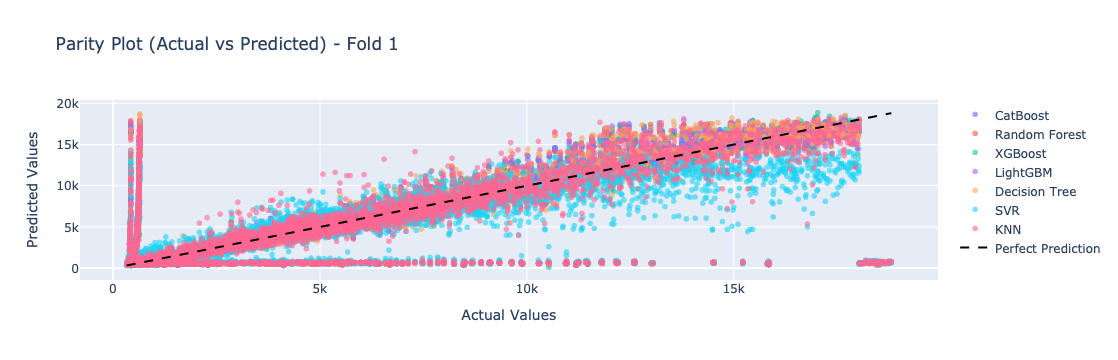

In [152]:
import plotly.graph_objects as go

# Get actual test values for fold 1
y_test_fold_1 = Y[test_index]  

# a dictionary to store predictions for each model
model_predictions = {
    "CatBoost": [],
    "Random Forest": [],
    "XGBoost": [],
    "LightGBM": [],
    "Decision Tree": [],
    "SVR": [],
    "KNN": []
}

# Loop through each model and store predictions from the cross-validation loop
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # Split data into train and test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Scale the features for models 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model
    for name, model in models_all.items():
        if name in ['SVR', 'KNN']:
            model.fit(X_train_scaled, y_train)
            y_train_pred = model.predict(X_train_scaled)
            y_test_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

        # Store predictions for the selected fold 
        if fold == 1:  # Only collect predictions from the first fold
            model_predictions[name].extend(y_test_pred)  # Use y_test_pred for parity plot

# Create the parity plot using Plotly
fig = go.Figure()

# Add traces for each model
for name, predictions in model_predictions.items():
    fig.add_trace(go.Scatter(
        x=y_test_fold_1, y=predictions, mode='markers', name=name,
        marker=dict(opacity=0.6)
    ))

# Add diagonal line 
fig.add_trace(go.Scatter(
    x=[y_test_fold_1.min(), y_test_fold_1.max()],
    y=[y_test_fold_1.min(), y_test_fold_1.max()],
    mode='lines', name='Perfect Prediction', line=dict(color='black', dash='dash')
))

# Update layout for the plot
fig.update_layout(
    title="Parity Plot (Actual vs Predicted) - Fold 1",
    xaxis_title="Actual Values",
    yaxis_title="Predicted Values",
    showlegend=True
)

# Show the plot
fig.show()


### LightGBM Training Log

The following log entries are from LightGBM during the training process:

---

#### 1. **Row-wise Multi-threading Overhead:**
- LightGBM is **auto-selecting** the optimal threading strategy for training. 
- In this case, it chooses **row-wise multi-threading**. The log indicates the overhead for testing this choice:
  - `Overhead: 0.000733 seconds`
  - `Overhead: 0.000499 seconds`
  - `Overhead: 0.000410 seconds`
  - `Overhead: 0.000443 seconds`
  - `Overhead: 0.000414 seconds`


#### 2. **Total Bins:**
- **Total Bins** refers to the number of discrete intervals (or bins) used to represent feature values for training.
  - `Total Bins: 1274`
  - `Total Bins: 1278`
  - `Total Bins: 1275`
  - `Total Bins: 1278`
  - `Total Bins: 1278`

- This number reflects how finely the continuous features are discretized during training. It helps in optimizing the training process.

---

#### 3. **Training Set Information:**
- **Number of Data Points**: 43,152
- **Number of Features**: 9
- The dataset contains 43,152 data points and 9 features for the model training. This number remains constant throughout all training logs.

---

#### 4. **Starting Score:**
- Each training round starts with an initial score (base score). This score is the starting point of the model's predictions before learning begins.
  - `Start training from score: 3939.490707`
  - `Start training from score: 3932.102985`
  - `Start training from score: 3940.356113`
  - `Start training from score: 3915.757323`
  - `Start training from score: 3936.291481`

---

#### Key Insights from the Log:
- The model is auto-selecting the optimal threading strategy for each training iteration. The overhead for testing this is minimal, but you can optimize it further by forcing the threading strategy.
- The Total Bins remain relatively stable, indicating consistency in feature discretization across training rounds.
- The number of data points and features used in the training set is consistent across all rounds, confirming stable input data.
- The starting score values indicate the baseline prediction before boosting starts.

6) `Select 3 best models for your dataset based on the R2 metric. Plot the results of R² obtained for the test set by selected models with Plotly Bar plot.`

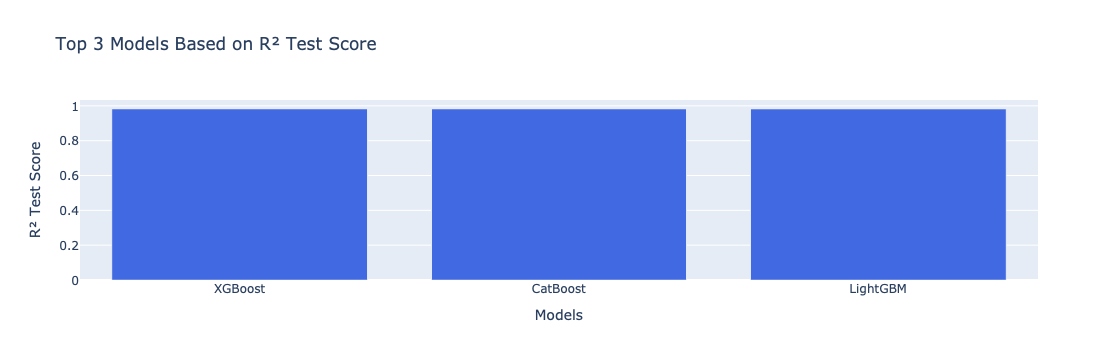

In [156]:
# Calculate the average R² for each model
r2_test_avg = r2_test_df.groupby('Model')['R² Test'].mean().reset_index()

# Sort the models by their R² Test scores in descending order
r2_test_avg_sorted = r2_test_avg.sort_values(by='R² Test', ascending=False)

# Selecting the top 3 models based on R² Test scores
top_3_models = r2_test_avg_sorted.head(3)

# Create the Plotly Bar plot for the top 3 models
fig = go.Figure()

# Add bars for each of the top 3 models
fig.add_trace(go.Bar(
    x=top_3_models['Model'], 
    y=top_3_models['R² Test'], 
    name="R² Test",
    marker=dict(color='royalblue')
))

# Update the layout of the plot
fig.update_layout(
    title="Top 3 Models Based on R² Test Score",
    xaxis_title="Models",
    yaxis_title="R² Test Score",
    showlegend=False
)

# Show the plot
fig.show()


The top 3 models based on their average R² score are selected. There are 
1) XGBoost with R2 test score of 0.981965
2) CatBoost with R2 test score of 0.981961
3) LightGBM with R2 test score of 0.981859

In [ ]:
!pip install catboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab import drive
drive.mount('/content/drive')
# Load data
df = pd.read_csv("/content/drive/My Drive/diamonds.csv")

# Encode categorical variables
label_encoders = {}
for column in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    df[column + '_encoded'] = le.fit_transform(df[column])
    label_encoders[column] = le

df.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)

# Define features and target
X = df[['carat', 'cut_encoded', 'color_encoded', 'clarity_encoded', 'depth', 'table', 'x', 'y', 'z']]
Y = df[['price']]

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Scale the data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=5, random_state=42),
    "XGBoost": xgb.XGBRegressor(learning_rate=0.1, max_depth=6, n_estimators=200, objective='reg:squarederror', random_state=42),
    "CatBoost": CatBoostRegressor(depth=10, iterations=300, learning_rate=0.1, verbose=0, random_state=42),
    "LightGBM": lgb.LGBMRegressor(learning_rate=0.05, n_estimators=300, num_leaves=31, random_state=42)
}

# Train models and calculate metrics
model_results = {}
model_forecasts = {}
for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_test_pred = model.predict(x_test_scaled)
    y_train_pred = model.predict(x_train_scaled)

    # Store results
    model_results[model_name] = {
        "R2": r2_score(y_test, y_test_pred),
        "MSE": mean_squared_error(y_test, y_test_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "MAE": mean_absolute_error(y_test, y_test_pred)
    }

    # Forecasting Results for Page 3
    forecast_df = pd.DataFrame({
        "True Value": y_test,
        "Forecasted Value": y_test_pred,
        "Absolute Error": np.abs(y_test - y_test_pred)
    }).sort_values(by="Absolute Error", ascending=False)
    model_forecasts[model_name] = forecast_df

# Widgets
model_dropdown = widgets.Dropdown(
    options=list(models.keys()),
    value=list(models.keys())[0],
    description="Model:"
)
metrics_select = widgets.SelectMultiple(
    options=["R2", "MSE", "RMSE", "MAE"],
    value=["R2"],
    description="Metrics:"
)
output_tab1 = widgets.Output()
output_tab2 = widgets.Output()
output_tab3 = widgets.Output()
tabs = widgets.Tab(children=[output_tab1, output_tab2, output_tab3])
tabs.set_title(0, "Data & Hyperparameters")
tabs.set_title(1, "Performance")
tabs.set_title(2, "Forecasts")

# Replace with your names and surnames
names = "Madhumitha", "Kesavan"

# Callback Function
def update_tabs(*args):
    selected_model = model_dropdown.value
    selected_metrics = metrics_select.value

    # Tab 1: Data & Hyperparameters
    with output_tab1:
        clear_output()
        display(df.head())
        print("\nHyperparameters:")
        print(models[selected_model].get_params())

    # Tab 2: Performance Metrics
    with output_tab2:
        clear_output()
        model_metrics = model_results[selected_model]
        filtered_metrics = {metric: model_metrics[metric] for metric in selected_metrics}
        filtered_metrics_df = pd.DataFrame(filtered_metrics, index=[selected_model])
        display(filtered_metrics_df)
        filtered_metrics_df.T.plot(kind="bar", legend=False)
        plt.title(f"{selected_model} - Selected Metrics")
        plt.ylabel("Values")
        plt.show()

    # Tab 3: Forecasts
    with output_tab3:
        clear_output()
        forecast_df = model_forecasts[selected_model]
        display(forecast_df)

# Attach Callback
model_dropdown.observe(update_tabs, names="value")
metrics_select.observe(update_tabs, names="value")

# Initial Update
update_tabs()

# Dashboard Layout
dashboard = widgets.VBox([
    widgets.Label(value=f"Diamond Price Prediction Dashboard by {', '.join(names)}"),
    widgets.HBox([model_dropdown, metrics_select]),
    tabs
])
display(dashboard)
